
<div dir=ltr align=center>

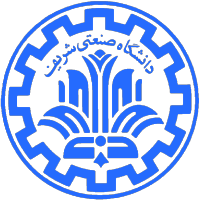

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Supervised Learning: Random Forest <br>
<font color=696880 size=4>
Prepared by Alireza Mirshafieian

____

# Student Information

In [1]:
student_number = '402110876'
full_name = 'alireza sarbaz'

# Titanic Survival Prediction
Welcome to this hands-on machine learning tutorial using the famous **Titanic dataset**! In this notebook, we'll walk through the process of utilizing a **Random Forest Classifier** to predict passenger survival.

The Titanic disaster claimed 1,502 lives, but survival was not a matter of chance alone. Using real passenger data—including class, gender, and age—this project challenges you to build a predictive model that answers a key question: which passengers were most likely to survive?

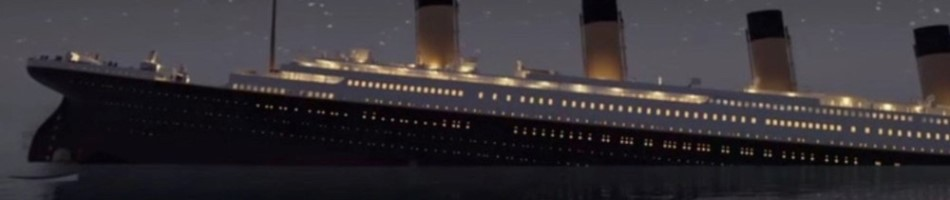

## 1️⃣ Import Libraries
Let's start by importing the essential Python libraries for data manipulation, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## 2️⃣ Load the Titanic Dataset
We'll use the Titanic dataset from Kaggle. It contains passenger details like age, gender, class, and whether they survived. We'll start by loading the training data.

In [3]:
# Use pandas to load the Titanic dataset from a CSV file into a DataFrame named titanic_data
titanic_data = pd.read_csv('titanic.csv')

print("Dataset Shape:", titanic_data.shape)

# Use head() to display the first few rows of the dataset
print(titanic_data.head())

Dataset Shape: (891, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  
0      0         A/5 21171   7.2500   NaN  
1      0          PC 17599  71.2833   C85  
2      0  STON/O2. 3101282   7.9250   NaN  
3      0            113803  53.1000  C123  
4      0            373450   8.0500   NaN  


# Data Dictionary

| Variable | Definition | Key |
| :--- | :--- | :--- |
| `survival` | Survival | 0 = No, 1 = Yes |
| `pclass` | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| `sex` | Sex | |
| `Age` | Age in years | |
| `sibsp` | # of siblings / spouses aboard the Titanic | |
| `parch` | # of parents / children aboard the Titanic | |
| `ticket` | Ticket number | |
| `fare` | Passenger fare | |
| `cabin` | Cabin number | |

## Variable Notes

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1.

## 3️⃣ Explore the Dataset
Before building a model, we need to **explore the data**. This helps us understand missing values, feature types, and distributions.

In [4]:
# Use info() to display general information about the dataset (column types, non-null counts, etc.)
print(titanic_data.info())

# Use isnull().sum() to check how many missing values each column has
print("\nMissing Values:")
print(titanic_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64


As you can see, the "Cabin" feature has a lot of missing values. Perhaps it will be best if we ignore that feature completely. "Age" also has some missing values, but the information it offers may be too valuable to discard. We'll have to figure out what to do with it later.

## 4️⃣ Data Visualization
Visualizations help us spot trends and relationships in the data. Let's look at survival rates by gender, class, and age.

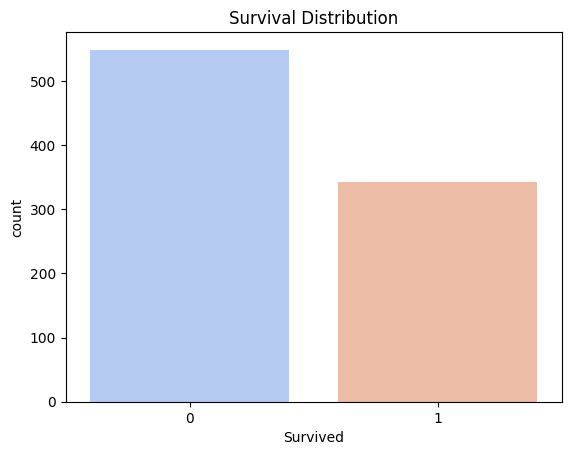

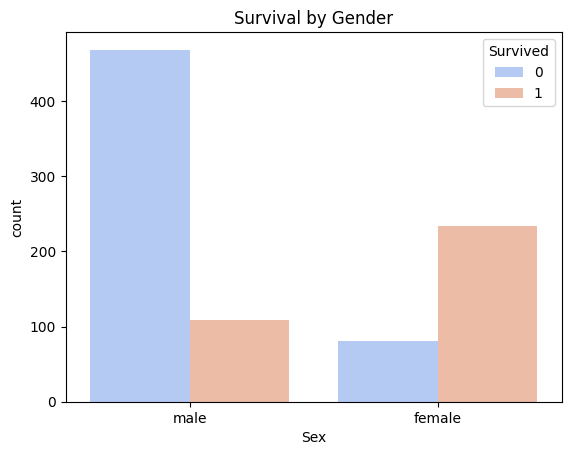

In [5]:
# Use sns to plot the distribution of the target variable 'Survived'
sns.countplot(data=titanic_data, x='Survived', palette='coolwarm')
plt.title('Survival Distribution')
plt.show()

# Use sns to plot survival counts grouped by gender
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival by Gender')
plt.show()

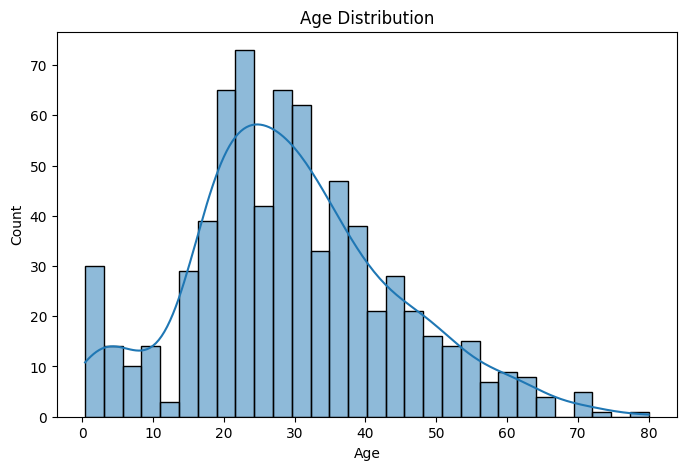

In [6]:
plt.figure(figsize=(8,5))
# Use sns to plot a histogram showing the age distribution of passengers
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

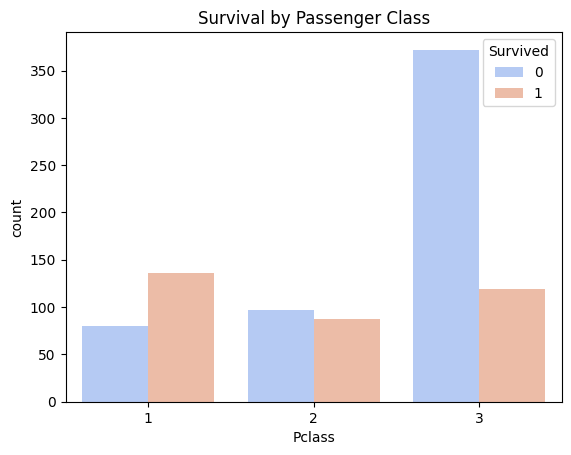

In [7]:
# Plot survival counts grouped by passenger class (Pclass)
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='coolwarm')
plt.title('Survival by Passenger Class')
plt.show()

Let's create a **heatmap** that visualizes the **correlation** between all numeric features in the dataset.

**Correlation** measures how strongly two numerical variables are related:
- **+1** → strong positive relationship (as one increases, the other also increases)  
- **-1** → strong negative relationship (as one increases, the other decreases)  
- **0** → no **linear** relationship

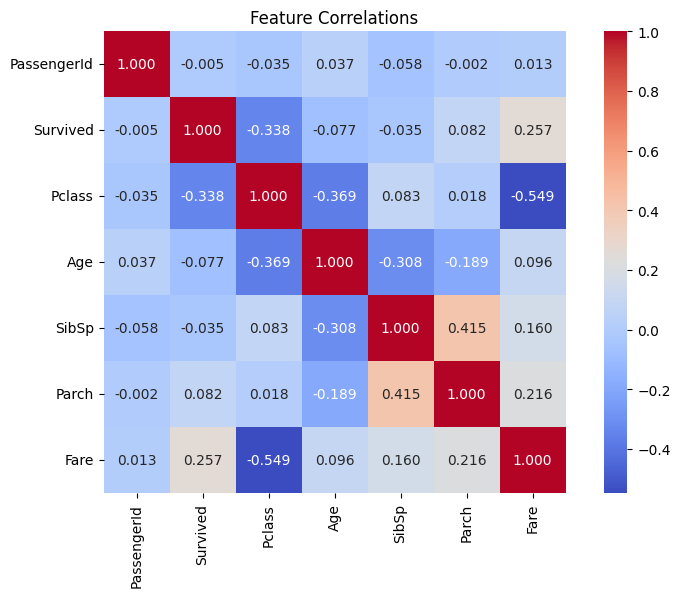

In [8]:
plt.figure(figsize=(10,6))
# Use corr() to get the correlations between numeric features and use sns to visualize it with a heatmap
correlation_matrix = titanic_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', square=True)
plt.title('Feature Correlations')
plt.show()

As you can see, PassengerId has almost no correlation with other features. This was expected as PassengerId is simply the index that we've given the passengers in our dataset.

You can see that Pclass and fare seem to be highly correlated, as one would expect.

## 5️⃣ Data Preprocessing
We'll clean and prepare the data for modeling:
- Drop rows with missing target values
- Encode the `Sex` column (male=1, female=0)
- Fill missing `Age` values with the median. You can try other methods.
- Split into training and testing sets. We will use the testing set to evaluate our model.

In [9]:
# Remove rows where the target column 'Survived' is missing
titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
y = titanic_data['Survived']

# Convert the 'Sex' column to numeric values (e.g., female=0, male=1)
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Replace missing 'Age' values with the median age
X['Age'] = X['Age'].fillna(X['Age'].median())

# Split the dataset into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
219,2,1,30.0,0,0,10.5000
258,1,0,35.0,0,0,512.3292
85,3,0,33.0,3,0,15.8500
128,3,0,28.0,1,1,22.3583
125,3,1,12.0,1,0,11.2417


## 6️⃣ Model Training — Random Forest Classifier
A **Random Forest** is an ensemble model made up of many decision trees. It’s robust, handles nonlinear relationships well, and reduces overfitting.

In [10]:
# Create a RandomForestClassifier with 100 trees and a fixed random_state
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Use fit() to train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Use the trained model to predict survival on the test data
y_pred = rf_classifier.predict(X_test)

## 7️⃣ Model Evaluation
We'll measure how well our model performs using accuracy, a confusion matrix, and a classification report.

In [11]:
# Calculate the model’s accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.79

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       120
           1       0.65      0.81      0.72        59

    accuracy                           0.79       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.81      0.79      0.80       179



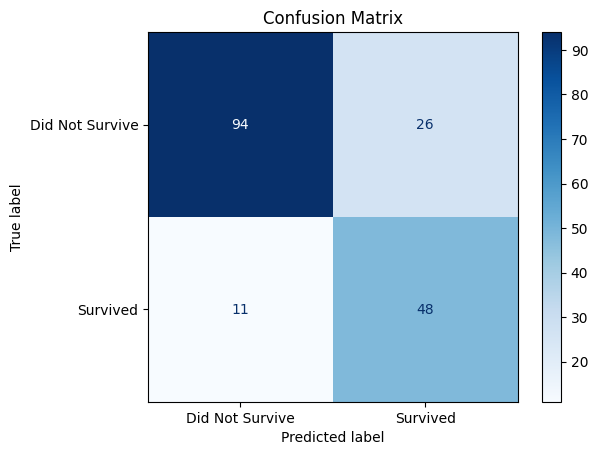

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Explain what a confusion matrix is and how it can help us evaluate our model.

**A confusion matrix** is a table that visualizes the performance of a classification model by comparing the actual labels with the predicted labels. It provides a detailed breakdown of the model's predictions, showing where the model made correct predictions and where it made errors.

For a binary classification problem (like survival prediction), the confusion matrix is a 2×2 table with four key metrics:

1. **True Positives (TP)**: Cases where the model correctly predicted the positive class (e.g., correctly predicted "Survived")
2. **True Negatives (TN)**: Cases where the model correctly predicted the negative class (e.g., correctly predicted "Did Not Survive")
3. **False Positives (FP)**: Cases where the model incorrectly predicted the positive class (Type I error - predicted "Survived" but actually "Did Not Survive")
4. **False Negatives (FN)**: Cases where the model incorrectly predicted the negative class (Type II error - predicted "Did Not Survive" but actually "Survived")

**How it helps evaluate the model:**

- **Accuracy**: (TP + TN) / (TP + TN + FP + FN) - Overall correctness
- **Precision**: TP / (TP + FP) - Of all positive predictions, how many were correct?
- **Recall (Sensitivity)**: TP / (TP + FN) - Of all actual positives, how many did we catch?
- **Specificity**: TN / (TN + FP) - Of all actual negatives, how many did we correctly identify?
- **F1-Score**: Harmonic mean of precision and recall

The confusion matrix helps us understand not just how accurate our model is, but also what types of errors it makes. For example, in survival prediction, we might care more about minimizing false negatives (not predicting survival when someone actually survived) than false positives. This insight helps us fine-tune the model and choose appropriate evaluation metrics.

## 8️⃣ Feature Importance Visualization
Random Forests can show us which features are most important for prediction.

At its core, feature_importances_ from a scikit-learn Random Forest is a normalized metric that quantifies the mean decrease in impurity (specifically, Gini Impurity or Entropy for classification, MSE for regression) averaged across all trees in the forest, attributable to each feature.

It answers: "When making decisions across all the trees in this forest, which features were most frequently and most effectively used to create pure nodes, thereby driving the predictive accuracy?"

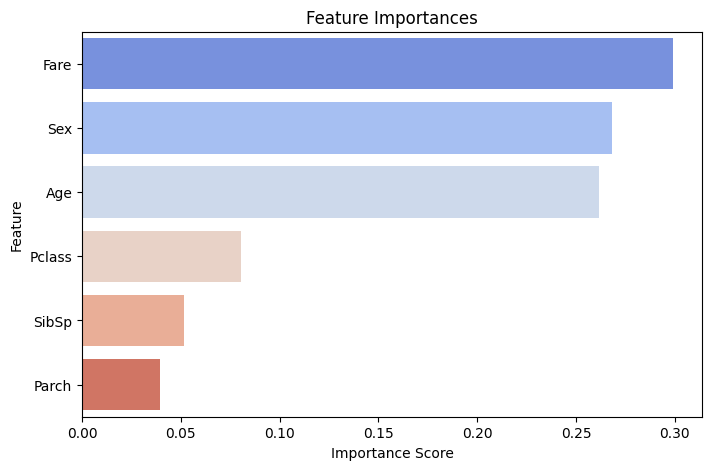

In [13]:
# Use feature_importances_ to retrieve the feature importances from the trained model
importances = rf_classifier.feature_importances_

# Store the feature names in a variable
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices], palette='coolwarm')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## 9️⃣ Try a Sample Prediction
Let's test our model on a single passenger from the test set to see whether they would survive.

In [14]:
sample = X_test.iloc[0:1]
true_value = y_test.iloc[0]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()

print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'🟢 Survived' if prediction[0] == 1 else '🔴 Did Not Survive'}")
print(f"True Survival: {'🟢 Survived' if true_value == 1 else '🔴 Did Not Survive'}")


Sample Passenger: {'Pclass': 1.0, 'Sex': 1.0, 'Age': 54.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 51.8625}
Predicted Survival: 🔴 Did Not Survive
True Survival: 🔴 Did Not Survive


## 🎯 Well Done!
Eager for more? Head over to the Kaggle competition to test your skills, build more accurate models, and see how you rank on the leaderboard! Here is the link:

https://www.kaggle.com/c/titanic